# ***IMPORTING DATASET FROM KAGGLE***

In [ ]:
! pip install kaggle


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle


mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rithikaarthanari","key":"1051da33cd88a524200171ac2efdc32e"}'}

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d akash2907/bird-species-classification

100% 1.37G/1.37G [00:50<00:00, 29.5MB/s]
100% 1.37G/1.37G [00:50<00:00, 29.4MB/s]


In [ ]:

!unzip /content/bird-species-classification.zip

Archive:  /content/bird-species-classification.zip
  inflating: test_data/test_data/blasti/DSC_6396.jpg  
  inflating: test_data/test_data/blasti/DSC_6397.jpg  
  inflating: test_data/test_data/blasti/DSC_6398.jpg  
  inflating: test_data/test_data/blasti/DSC_6399.jpg  
  inflating: test_data/test_data/blasti/DSC_6400.jpg  
  inflating: test_data/test_data/blasti/DSC_6401.jpg  
  inflating: test_data/test_data/blasti/DSC_6402.jpg  
  inflating: test_data/test_data/blasti/DSC_6403.jpg  
  inflating: test_data/test_data/blasti/DSC_6405.jpg  
  inflating: test_data/test_data/blasti/DSC_6406.jpg  
  inflating: test_data/test_data/blasti/DSC_6407.jpg  
  inflating: test_data/test_data/blasti/DSC_6408.jpg  
  inflating: test_data/test_data/blasti/DSC_6409.jpg  
  inflating: test_data/test_data/blasti/DSC_6410.jpg  
  inflating: test_data/test_data/blasti/DSC_6411.jpg  
  inflating: test_data/test_data/bonegl/DSC_4587.jpg  
  inflating: test_data/test_data/bonegl/DSC_4588.jpg  
  inflating: t

# ***DATA AUGMENTATION***

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_gen = ImageDataGenerator(rescale=(1./255),horizontal_flip=True,shear_range=0.2)
test_gen = ImageDataGenerator(rescale=(1./255))


In [ ]:
train = train_gen.flow_from_directory('/content/train_data/train_data',
                                      target_size=(120, 120),
                                      class_mode='categorical',
                                      batch_size=8)
test = test_gen.flow_from_directory('/content/test_data/test_data',
                                    target_size=(120, 120),
                                      class_mode='categorical',
                                      batch_size=8)

Found 150 images belonging to 16 classes.
Found 157 images belonging to 16 classes.


In [ ]:
train.class_indices

{'blasti': 0,
 'bonegl': 1,
 'brhkyt': 2,
 'cbrtsh': 3,
 'cmnmyn': 4,
 'gretit': 5,
 'hilpig': 6,
 'himbul': 7,
 'himgri': 8,
 'hsparo': 9,
 'indvul': 10,
 'jglowl': 11,
 'lbicrw': 12,
 'mgprob': 13,
 'rebimg': 14,
 'wcrsrt': 15}

# ***CNN TRAINING***

In [ ]:
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten,Dense
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()
model.add(Convolution2D(20,(3,3),activation='relu',input_shape=(120, 120, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(45,activation='relu'))
model.add(Dense(16,activation='softmax'))


In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train,batch_size=8,validation_data=test,epochs=10)

Epoch 1/10
19/19 [==============================] - 133s 7s/step - loss: 4.5692 - accuracy: 0.1000 - val_loss: 2.7878 - val_accuracy: 0.0446
Epoch 2/10
19/19 [==============================] - 128s 7s/step - loss: 2.6594 - accuracy: 0.1733 - val_loss: 2.7606 - val_accuracy: 0.0637
Epoch 3/10
19/19 [==============================] - 127s 7s/step - loss: 2.5389 - accuracy: 0.2333 - val_loss: 2.7286 - val_accuracy: 0.0764
Epoch 4/10
19/19 [==============================] - 105s 6s/step - loss: 2.4127 - accuracy: 0.2467 - val_loss: 2.7833 - val_accuracy: 0.1210
Epoch 5/10
19/19 [==============================] - 130s 7s/step - loss: 2.2413 - accuracy: 0.2467 - val_loss: 2.8717 - val_accuracy: 0.1338
Epoch 6/10
19/19 [==============================] - 128s 7s/step - loss: 2.0844 - accuracy: 0.3200 - val_loss: 2.7104 - val_accuracy: 0.1338
Epoch 7/10
19/19 [==============================] - 128s 7s/step - loss: 1.9463 - accuracy: 0.3600 - val_loss: 2.7870 - val_accuracy: 0.1656
Epoch 8/10
19

In [ ]:
model.save('BIRD CLASSIFICATION.h5')

# ***TESTING***

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image


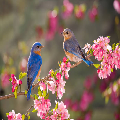

In [ ]:
img = image.load_img('/content/istockphoto-183412466-612x612.jpg',target_size=(120,120))
img

In [ ]:
img = image.img_to_array(img)
img


array([[[ 88.,  79.,  64.],
        [ 88.,  79.,  64.],
        [ 88.,  79.,  64.],
        ...,
        [126.,  73.,  83.],
        [107.,  69.,  58.],
        [103.,  69.,  42.]],

       [[ 87.,  78.,  63.],
        [ 87.,  78.,  63.],
        [ 86.,  77.,  62.],
        ...,
        [176.,  98., 122.],
        [133.,  65.,  80.],
        [114.,  60.,  58.]],

       [[ 86.,  77.,  62.],
        [ 86.,  77.,  62.],
        [ 85.,  75.,  65.],
        ...,
        [204., 125., 157.],
        [167.,  72., 106.],
        [125.,  54.,  72.]],

       ...,

       [[ 17.,  18.,  20.],
        [ 24.,  25.,  27.],
        [ 43.,  40.,  31.],
        ...,
        [107.,  22.,  53.],
        [ 91.,  21.,  31.],
        [ 80.,  29.,  34.]],

       [[ 19.,  21.,  18.],
        [ 27.,  29.,  26.],
        [ 40.,  40.,  32.],
        ...,
        [100.,  31.,  36.],
        [ 81.,  25.,  26.],
        [ 76.,  25.,  30.]],

       [[ 22.,  18.,  17.],
        [ 26.,  22.,  21.],
        [165., 1

In [ ]:
img = np.expand_dims(img,axis=0)
img


array([[[[ 88.,  79.,  64.],
         [ 88.,  79.,  64.],
         [ 88.,  79.,  64.],
         ...,
         [126.,  73.,  83.],
         [107.,  69.,  58.],
         [103.,  69.,  42.]],

        [[ 87.,  78.,  63.],
         [ 87.,  78.,  63.],
         [ 86.,  77.,  62.],
         ...,
         [176.,  98., 122.],
         [133.,  65.,  80.],
         [114.,  60.,  58.]],

        [[ 86.,  77.,  62.],
         [ 86.,  77.,  62.],
         [ 85.,  75.,  65.],
         ...,
         [204., 125., 157.],
         [167.,  72., 106.],
         [125.,  54.,  72.]],

        ...,

        [[ 17.,  18.,  20.],
         [ 24.,  25.,  27.],
         [ 43.,  40.,  31.],
         ...,
         [107.,  22.,  53.],
         [ 91.,  21.,  31.],
         [ 80.,  29.,  34.]],

        [[ 19.,  21.,  18.],
         [ 27.,  29.,  26.],
         [ 40.,  40.,  32.],
         ...,
         [100.,  31.,  36.],
         [ 81.,  25.,  26.],
         [ 76.,  25.,  30.]],

        [[ 22.,  18.,  17.],
       

In [ ]:
model.predict(img)

1/1 [==============================] - 0s 112ms/step


array([[2.6919680e-30, 0.0000000e+00, 0.0000000e+00, 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 1.7006507e-20, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 1.7705003e-38, 0.0000000e+00]],
      dtype=float32)

In [ ]:
pred = np.argmax(model.predict(img))

1/1 [==============================] - 0s 38ms/step


In [ ]:
import os
output = os.listdir('/content/train_data/train_data')
output


['bonegl',
 'indvul',
 'cbrtsh',
 'rebimg',
 'cmnmyn',
 'brhkyt',
 'gretit',
 'jglowl',
 'lbicrw',
 'himbul',
 'mgprob',
 'hsparo',
 'hilpig',
 'blasti',
 'wcrsrt',
 'himgri']

In [ ]:
output[pred]


'rebimg'

# ***MODEL TUNING***

In [ ]:
from tensorflow.keras.layers import BatchNormalization, Dropout


# Initializing the seq model
model = Sequential()
# Adding conv layer with input
model.add(Convolution2D(12,(3,3),activation='relu',input_shape=(120, 120, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(24,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Convolution2D(36,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
# Normalizing the conv layer output
model.add(BatchNormalization())

# Hiddern layers
model.add(Dense(62,activation='relu'))
model.add(Dense(32,activation='relu'))

# Output layer
model.add(Dense(16,activation='softmax'))


In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [ ]:
'''from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='accuracy',patience=8)'''

In [ ]:
model.fit(train,batch_size=8,validation_data=test,epochs=50)


Epoch 1/50
19/19 [==============================] - 109s 6s/step - loss: 2.7123 - accuracy: 0.1800 - val_loss: 2.7582 - val_accuracy: 0.0828
Epoch 2/50
19/19 [==============================] - 127s 7s/step - loss: 2.1061 - accuracy: 0.3733 - val_loss: 2.7615 - val_accuracy: 0.0637
Epoch 3/50
19/19 [==============================] - 134s 7s/step - loss: 1.5958 - accuracy: 0.4933 - val_loss: 2.7860 - val_accuracy: 0.0510
Epoch 4/50
19/19 [==============================] - 126s 7s/step - loss: 1.4599 - accuracy: 0.5667 - val_loss: 2.6961 - val_accuracy: 0.1592
Epoch 5/50
19/19 [==============================] - 103s 6s/step - loss: 1.1983 - accuracy: 0.6467 - val_loss: 2.7267 - val_accuracy: 0.0955
Epoch 6/50
19/19 [==============================] - 127s 7s/step - loss: 0.9960 - accuracy: 0.6933 - val_loss: 2.7763 - val_accuracy: 0.0828
Epoch 7/50
19/19 [==============================] - 127s 7s/step - loss: 0.9004 - accuracy: 0.7533 - val_loss: 2.5445 - val_accuracy: 0.1911
Epoch 8/50
19

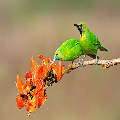

In [ ]:
img1 = image.load_img('/content/gretitnew.jpg',target_size=(120,120))
img1

In [ ]:
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output[pred]

1/1 [==============================] - 0s 141ms/step
2


'cbrtsh'

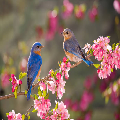

In [ ]:
img1 = image.load_img('/content/istockphoto-183412466-612x612.jpg',target_size=(120,120))
img1

In [ ]:
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
output[pred]

1/1 [==============================] - 0s 37ms/step
3


'rebimg'